Problem Statement for Project:

 You may have some experience of travelling to and from the airport. Have you ever used Uber or any other cab service for this travel? Did you at any time face the problem of cancellation by the driver or non-availability of cars?
Well, if these are the problems faced by customers, these very issues also impact the business of Uber. If drivers cancel the request of riders or if cars are unavailable, Uber loses out on its revenue. Let’s hear more about such problems that Uber faces during its operations.
As an analyst, i decide to address the problem Uber is facing - driver cancellation and non-availability of cars leading to loss of potential revenue

Business Objective of Project :

 The primary goal of this analysis is to uncover the underlying reasons behind issues such as trip cancellations and car unavailability. Subsequently, i aim to provide actionable recommendations to enhance the current situation.

# Loading data and knowing basic details about it.


In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Loading data to pandas
df=pd.read_csv("uber-data.csv")

In [3]:
df

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47
...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,15-07-2016 23:49:03,NaN
6741,6752,Airport,NaN,No Cars Available,15-07-2016 23:50:05,NaN
6742,6751,City,NaN,No Cars Available,15-07-2016 23:52:06,NaN
6743,6754,City,NaN,No Cars Available,15-07-2016 23:54:39,NaN


In [4]:
# checking no pf row na column
print("No. of rows: {}".format(df.shape[0]))
print("No. of cols: {}".format(df.shape[1]))

No. of rows: 6745
No. of cols: 6


In [5]:
# Necessary infromation about columns and there values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Request id         6745 non-null   int64  
 1   Pickup point       6745 non-null   object 
 2   Driver id          4095 non-null   float64
 3   Status             6745 non-null   object 
 4   Request timestamp  6745 non-null   object 
 5   Drop timestamp     2831 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 316.3+ KB


Shape: It has 6745 rows and 6 columns.

Columns:

Request id: This column contains integer values and has no missing values. It's an identifier for requests.

Pickup point: This column contains categorical data (object dtype) and has no missing values. It represents the location where a pickup is requested.

Driver id: This column contains float64 values and has missing values (NaNs) in some rows. It represent the identifier of the driver assigned to the request.

Status: This column contains categorical data (object dtype) and has no missing values. It represents the status of the ride request.

Request timestamp: This column contains datetime data represented as strings (object dtype) and has no missing values. It represents the timestamp when the ride was requested.

Drop timestamp: This column contains datetime data represented as strings (object dtype) and has missing values (NaNs) in some rows. It represents the timestamp when the ride was completed or dropped off.

Memory Usage: The DataFrame consumes approximately 316.3 KB of memory.

Data Types:

Integer (int64): Used for the "Request id" column.

Float (float64): Used for the "Driver id" column.

Object (object): Used for the "Pickup point," "Status," "Request timestamp," and "Drop timestamp" columns, indicating that these columns contain non-numeric (categorical or datetime) data.

Overall, this DataFrame appears to contain information related to ride requests, including details such as pickup points, driver IDs, status, and timestamps for both request and drop-off times. It's important to note that there are missing values in the "Driver id" and "Drop timestamp" columns that may need to be addressed depending on the analysis.

Request timestamp and drop timestamp type needs to be changed pandas datetime.



In [6]:
# checking for duplicates
df.duplicated().sum()

0

This confirms that there is no duplicates row in the data.

In [7]:
df.isnull().sum()/len(df)*100

Request id            0.000000
Pickup point          0.000000
Driver id            39.288362
Status                0.000000
Request timestamp     0.000000
Drop timestamp       58.028169
dtype: float64

Driver id column has 39% missing values.
Drop Timestamp has 58% missing values.

In [8]:
# Checking for any abnormal value.

print("Unique values of status coulumn - {}".format(df['Status'].unique()))
print("Unique values of Pickup point coulumn - {}".format(df['Pickup point'].unique()))

Unique values of status coulumn - ['Trip Completed' 'Cancelled' 'No Cars Available']
Unique values of Pickup point coulumn - ['Airport' 'City']


# Data cleaning and transforming


In [9]:
# Changing request timestamp and drop time stamp type to pandas date time.
df['Request timestamp']=pd.to_datetime(df['Request timestamp'])
df['Drop timestamp']=pd.to_datetime(df['Drop timestamp'])

In [10]:
# Getting hour and day of week extracted from datetime column
df['Request hour']=df['Request timestamp'].dt.hour
df['Drop hour']=df['Drop timestamp'].dt.hour
df['Day of week']=df['Request timestamp'].dt.dayofweek
df['Request date'] = df['Request timestamp'].dt.date

# Changing day of week values to days
mapping={0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'}
df['Day of week']=df['Day of week'].map(mapping)

# Naming time of day using Pickup hour column
df["TimeSlot"] = df["Request hour"].apply(lambda x: "Dawn" if x<=4 else ("Early Morning"
                                                                        if x<=9 else ("Noon"
                                                                                      if x<=16 else ("Late Evening"
                                                                                                     if x<=21 else "Night"))))
df['Ride duration']=df['Drop hour']-df['Request hour']


In [11]:
df.drop(columns=['Request timestamp','Drop timestamp'],inplace=True)

In [12]:
# Checking where are these missing values
df.groupby('Status').count()

,Request id,Pickup point,Driver id,Request hour,Drop hour,Day of week,Request date,TimeSlot,Ride duration
Status,,,,,,,,,
Cancelled,1264,1264,1264,1264,0,1264,1264,1264,0
No Cars Available,2650,2650,0,2650,0,2650,2650,2650,0
Trip Completed,2831,2831,2831,2831,2831,2831,2831,2831,2831


In case of cancelled  drop hour and ride duration is 0 as ride is cancelled so there will be no drop time.

In case of No cars avaolable driver id is not present as no car is available and so there will no drop hour and ride duration for this status.

So, can make a  assumption that there are no missing data in this dataset and we can now move to analysis




In [13]:
# Replacing null values in driver id , drop hour and ride duration.
df['Driver id'].fillna('Unknown',inplace=True)
df['Drop hour'].fillna('NA',inplace=True)
df['Ride duration'].fillna('NA',inplace=True)

In [14]:
# Checking all changes applied or not
df.sample(10)

,Request id,Pickup point,Driver id,Status,Request hour,Drop hour,Day of week,Request date,TimeSlot,Ride duration
5983,5092,Airport,Unknown,No Cars Available,19,NA,Thursday,2016-07-14,Late Evening,NA
2535,5825,Airport,267.0,Trip Completed,8,9.0,Friday,2016-07-15,Early Morning,1.0
4279,767,City,Unknown,No Cars Available,16,NA,Monday,2016-11-07,Noon,NA
2882,4580,City,16.0,Cancelled,9,NA,Thursday,2016-07-14,Early Morning,NA
3589,2119,City,181.0,Cancelled,16,NA,Wednesday,2016-12-07,Noon,NA
3116,5644,City,70.0,Cancelled,6,NA,Friday,2016-07-15,Early Morning,NA
4962,2409,Airport,Unknown,No Cars Available,20,NA,Wednesday,2016-12-07,Late Evening,NA
5492,3816,Airport,Unknown,No Cars Available,21,NA,Wednesday,2016-07-13,Late Evening,NA
3241,2459,Airport,101.0,Cancelled,20,NA,Wednesday,2016-12-07,Late Evening,NA
3191,432,City,89.0,Cancelled,8,NA,Monday,2016-11-07,Early Morning,NA


# Visual Analysis

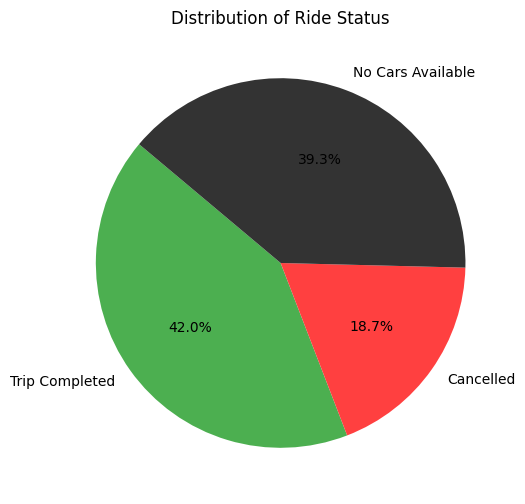

In [15]:
# Piechart for Percent of ride completed , cancelled and car not available
custom_palette = {
    "Cancelled": "#FF4040",
    "No Cars Available": "#333333",
    "Trip Completed": "#4CAF50"
}

labels = ['Trip Completed', 'Cancelled', 'No Cars Available']
sizes = [len(df[df['Status'] == 'Trip Completed']),
         len(df[df['Status'] == 'Cancelled']),
         len(df[df['Status'] == 'No Cars Available'])]

colors = [custom_palette[status] for status in labels]

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title("Distribution of Ride Status")
plt.show()


Only 42% of the requested ride get completed:

This is bad for any buisness if they can only fullfill 42% of their demands.

High Percentage of No Cars Available (39.3%):

Driver Supply: Insufficient driver availability, especially during peak hours or in high-demand areas, can lead to this issue.

Geographical Factors: Geographical constraints or traffic patterns could affect driver distribution, leading to periods of unavailability.

Technical Issues: Problems with the app or dispatching system can sometimes cause temporary unavailability.

Moderate Percentage of Cancelled Rides (18.7%):

User Cancels: Some customers may cancel rides after booking for various reasons, such as a change in plans, long wait times, or dissatisfaction with estimated fares.

Driver Cancels: Drivers may also cancel rides after accepting, possibly due to traffic, a change in their availability, or other factors.

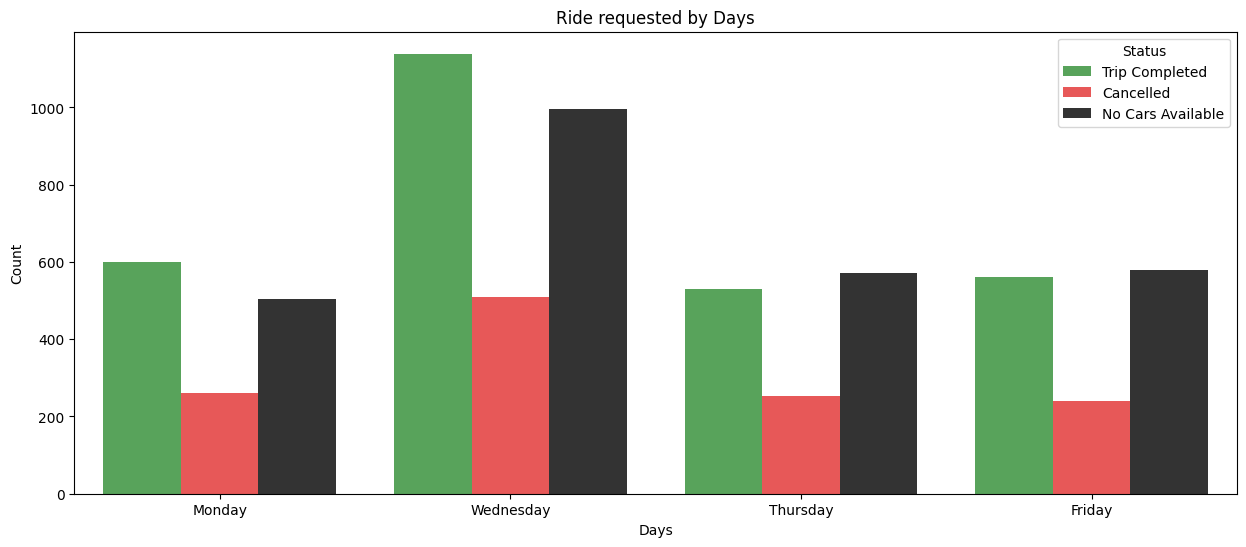

In [16]:
# Create a count plot
plt.figure(figsize=(15, 6))
sns.countplot(data=df, x='Day of week', palette=custom_palette, hue='Status')
plt.xlabel('Days')
plt.ylabel('Count')
plt.title('Ride requested by Days')

plt.show()


This data only have monday, wednesday, thursday, friday data.

On wednesday there are clearly more ride requested than any other day and so on wednesday the number of cancelled ride and no car availablity is also high.
This can be due to more flight landing or departuring that day.

In [17]:
not_available_or_cancelled_df=df[df["Status"] != "Trip Completed"]

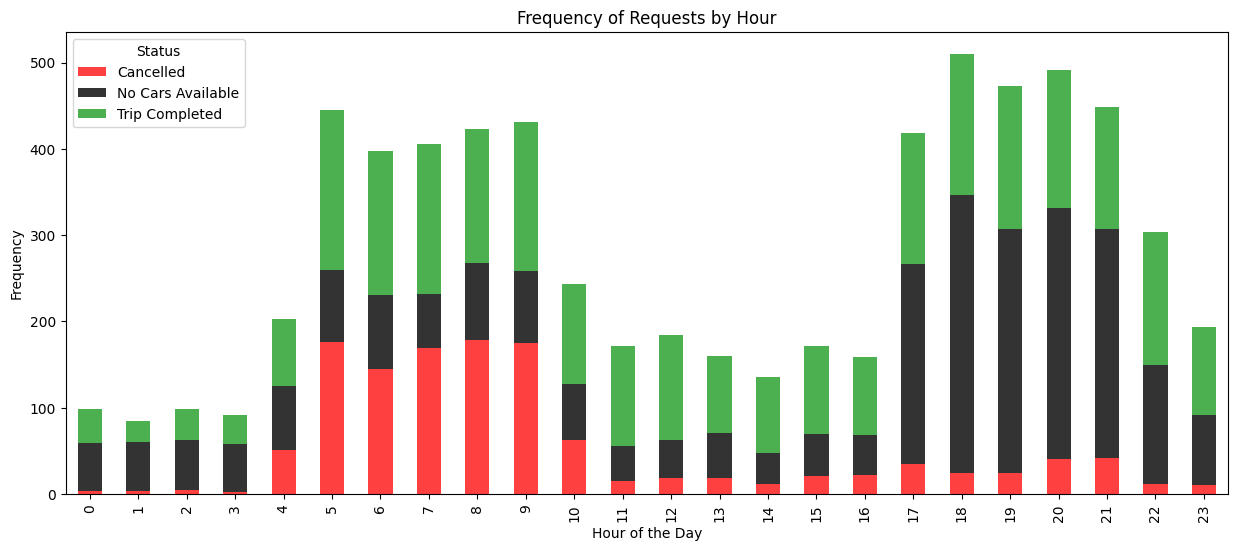

In [18]:
# Displaying request placed every are and there status
light_palette = sns.color_palette("pastel")

# Group the data and create a stacked bar plot
df.groupby(['Request hour', 'Status']).size().unstack().plot(kind='bar', stacked=True, figsize=(15, 6), color=custom_palette)

plt.title('Frequency of Requests by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Frequency')
plt.show()


Low ride requested between 0 to 3 at night and 11 to 16 in day
High demand in ride between 4 to 10 in morning and 17 to 23 in evening and night.
lets futher anlysis it with respect to timeslot and pickup points.

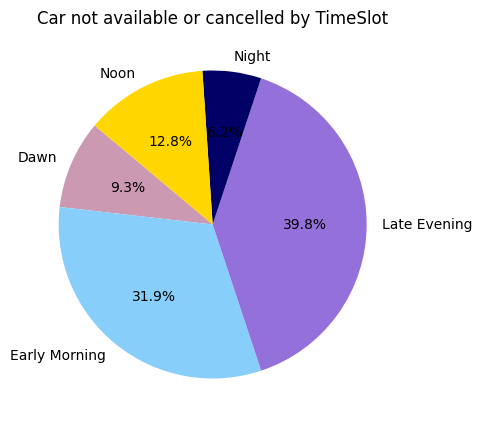

In [19]:
# pie chart sowing percent of ride cancelled and car not available by timeslot
timeslot_colors = {
    'Dawn': (0.8, 0.6, 0.7),
    'Early Morning': (0.53, 0.81, 0.98),
    'Noon': (1.0, 0.84, 0.0),
    'Late Evening': (0.58, 0.44, 0.86),
    'Night': (0.0, 0.0, 0.4)
}

colors = [timeslot_colors[slot] for slot in not_available_or_cancelled_df.groupby(['TimeSlot']).size().index]

plt.figure(figsize=(6, 5))
plt.pie(not_available_or_cancelled_df.groupby(['TimeSlot']).size(), labels=not_available_or_cancelled_df.groupby(['TimeSlot']).size().index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Car not available or cancelled by TimeSlot')
plt.show()


In early morning and late evening it is difficult to get cab as there is most number of  cancellation and non availability is around these two timeslots.

Rush Hours: Early morning and late evening often coincide with rush hours when people are commuting to and from work. This can lead to increased demand for cabs, making it more challenging to find available drivers.

More Flights : Usually people take early flights to attend meeting and in evening there are more returning flight. This
could be reason reason of high demand at these times that cannot be fullfilled.


Driver Shift Change: Some drivers might change shifts during these times, leading to a temporary decrease in the number of available drivers.

Traffic Congestion: During rush hours, traffic congestion can be significant. This can cause delays for both passengers and drivers, leading to trip cancellations and longer waiting times.

Limited Availability: If there are fewer drivers available during these times due to shift changes or other reasons, it can result in higher cancellation rates and non-availability.

Supply-Demand Imbalance: The number of ride requests may significantly exceed the available drivers during these peak hours, leading to unmet demand.

Safety Concerns: In some areas, there might be safety concerns during the early morning or late evening, which could affect driver availability and passenger demand.



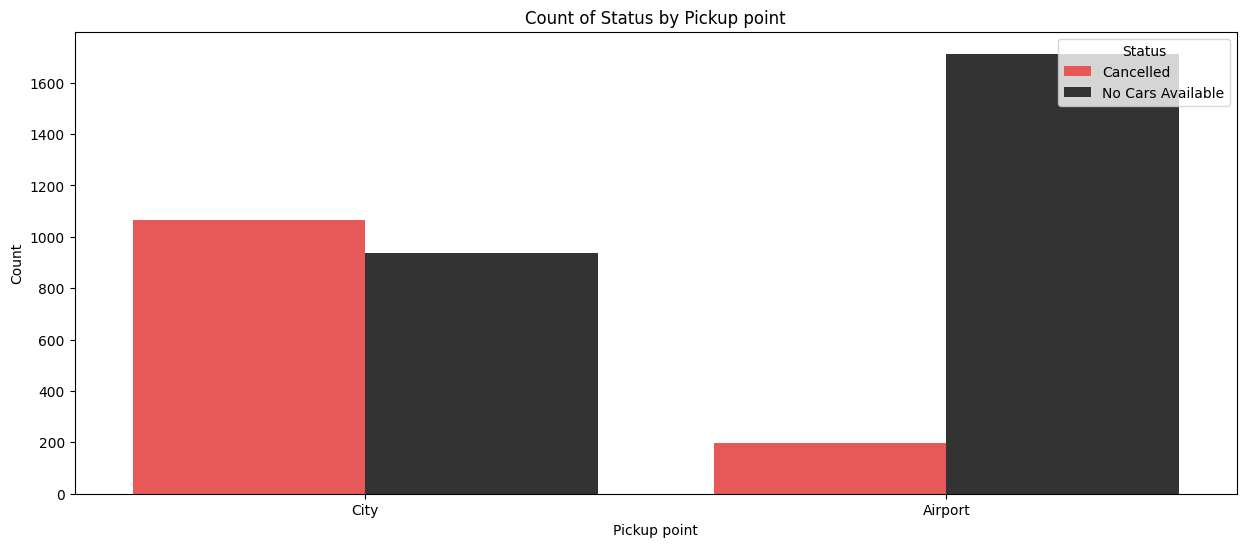

In [20]:
# Plotting countplot to get a picture of cancelled or not availability on pickup points
plt.figure(figsize=(15, 6))

pastel_palette = sns.color_palette("pastel")

sns.countplot(data=not_available_or_cancelled_df, x='Pickup point', hue='Status', palette=custom_palette)
plt.xlabel('Pickup point')
plt.ylabel('Count')
plt.title('Count of Status by Pickup point')
plt.legend(title='Status', loc='upper right')
plt.show()

More Cancelled Trips from City to Airport:

The data indicates that there are more cancelled trips when the rides originate in the City and are destined for the Airport.

This could be due to several reasons, such as passengers changing their travel plans, the unavailability of drivers willing to go to the Airport, or other factors specific to the City-to-Airport route.

To address this issue, the ride-hailing service may consider implementing measures to reduce cancellations, such as offering incentives to drivers for accepting Airport-bound trips or improving communication with passengers.

More "No Cabs Found" from Airport to City:

Conversely, the analysis shows that there are more instances where passengers are unable to find available cabs when their rides originate at the Airport and are headed to the City.

This situation could arise due to a shortage of available drivers near the Airport or during specific time periods when demand outstrips supply.

To improve service in this direction, the ride-hailing service may need to incentivize drivers to be present at the Airport during peak demand hours or employ dynamic pricing to encourage more drivers to serve this route when needed.

Lets analysis this further with respect to time.

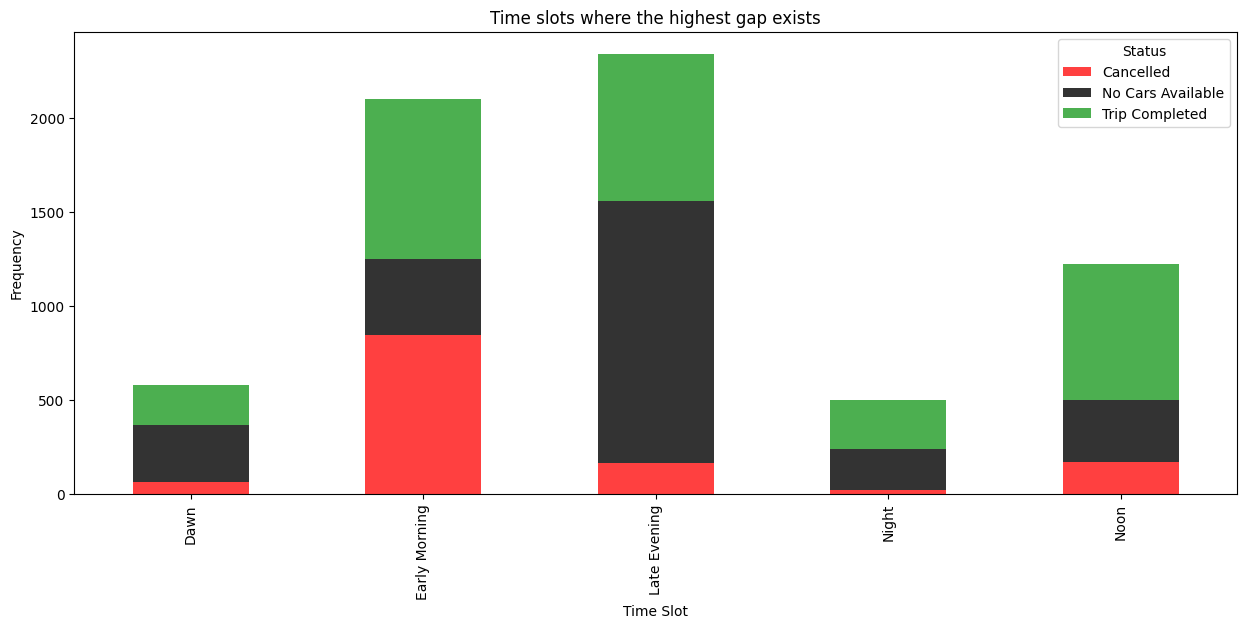

In [21]:
custom_palette = {
    "Cancelled": "#FF4040",
    "No Cars Available": "#333333",
    "Trip Completed": "#4CAF50"
}

#stacked bar plot
df.groupby(['TimeSlot', 'Status']).size().unstack().loc[:, custom_palette.keys()].plot(kind='bar', stacked=True, figsize=(15, 6), color=[custom_palette[col] for col in custom_palette.keys()])

plt.title('Time slots where the highest gap exists')
plt.xlabel('Time Slot')
plt.ylabel('Frequency')
plt.legend(title='Status')
plt.show()


Demand of cab is at peak in Early morning and late evenings.


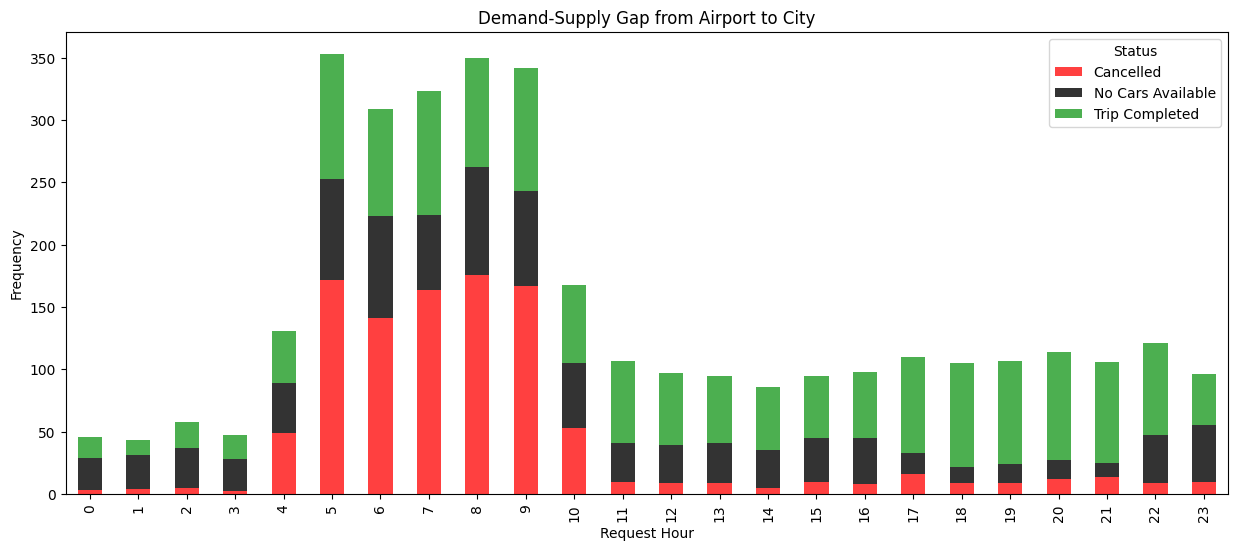

In [22]:
# a stacked bar plot
df[df['Pickup point'] == 'City'].groupby(['Request hour', 'Status']).size().unstack().plot(kind='bar', stacked=True, figsize=(15, 6), color=[custom_palette[col] for col in custom_palette.keys()])

plt.title('Demand-Supply Gap from Airport to City')
plt.xlabel('Request Hour')
plt.ylabel('Frequency')
plt.legend(title='Status')
plt.show()


High cancellation in morning:

Insufficient Supply: There might not be enough drivers available during the high-demand hours (4 to 10). When the demand exceeds the supply of available drivers, customers may have a hard time getting a ride, leading to more cancellations.

Driver Behavior: During peak hours, drivers may become more selective in accepting ride requests. They might cancel rides if they consider them less profitable or if the pickup location is not convenient for them.They dont want to go Airport in morning as they get more ride in city and they may have to wait at airport to get return customer.

Traffic Congestion: High-demand hours often coincide with heavy traffic. If drivers anticipate that the pickup location or route will result in a long and unprofitable trip due to traffic, they may cancel the ride.

User Behavior: Customers may also contribute to the higher cancellation rate during peak hours. They might request a ride impulsively and then cancel if the estimated wait time is longer than expected.

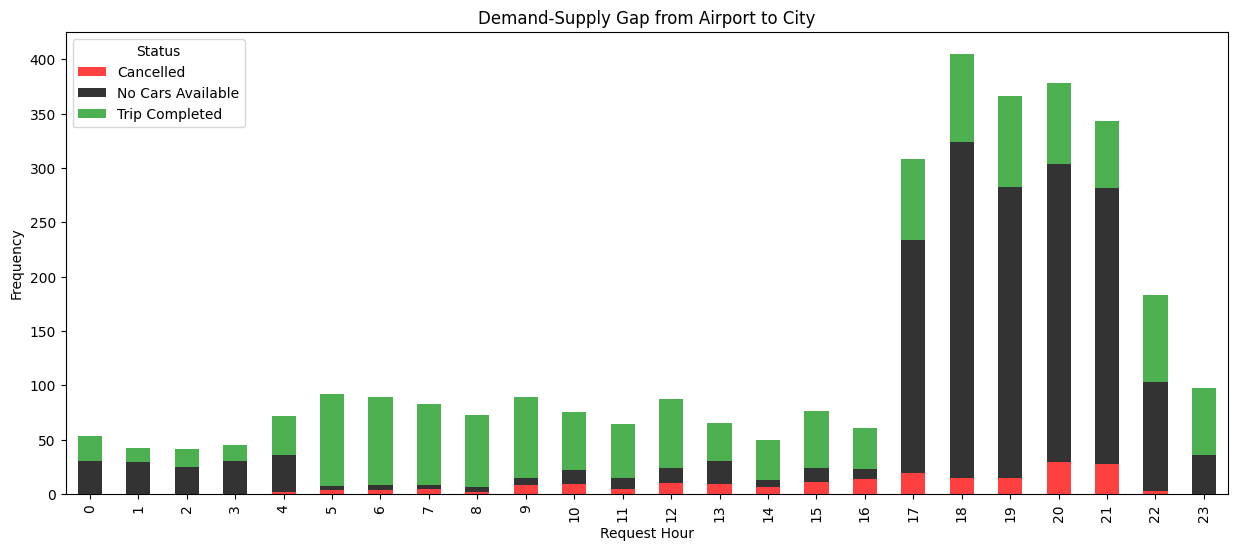

In [23]:
# a stacked bar plot
df[df['Pickup point'] == 'Airport'].groupby(['Request hour', 'Status']).size().unstack().plot(kind='bar', stacked=True, figsize=(15, 6), color=[custom_palette[col] for col in custom_palette.keys()])

plt.title('Demand-Supply Gap from Airport to City')
plt.xlabel('Request Hour')
plt.ylabel('Frequency')
plt.legend(title='Status')
plt.show()


No cars Available at airport from 17 to 22 in late evening:

Low number of cab booked for airport at noon: As we saw last graph were pickup point was city there are very few number of cab request in noon from city to airport so this can be a reason for very few ride available at airport during this time.

Peak Hours: Late evenings, especially around flight arrival times, can be peak hours for airport rides. If there is a sudden surge in demand and not enough drivers are available, it can lead to non-availability.

Traffic Congestion: Late evening traffic congestion around the airport can make it challenging for drivers to reach the pickup points, leading to delays and non-availability

Driver Preferences: Some drivers might prefer not to pick up passengers from the airport due to long waiting times at the pickup area.

## Problem 1: Cancellation in Morning

Reasons:

Driver Behavior at Peak Hours:

During Early mprnings, there's a significant surge in demand for rides from city to airport or other places. However, some drivers may choose to avoid  pickups at certain location during these peak hours. They might prefer shorter, more frequent trips within the city, as these tend to be more lucrative and involve less idle time. This behavior can result in high cancellation precisely when they are in high demand.

Return Journey Considerations:

When drivers take passengers from the city to the airport, they often face longer travel times due to traffic or distance. Once they arrive at the airport, they might encounter extended idle periods, waiting for flights to land and passengers to request rides. This prolonged idle time can be less financially attractive for drivers compared to consecutive, shorter city trips

Soultions:

Dynamic Pricing to Encourage Airport Rides:

One effective approach is to implement dynamic pricing strategies. By increasing the cost of rides from the city to the airport during morning hours, drivers can potentially earn more during these longer trips. This pricing adjustment aligns driver earnings with the extended travel times and can incentivize them to accept airport-bound passengers.

Driver Incentive Program:

To further encourage drivers to prioritize trips from the city to the airport, consider implementing a driver incentive program. In this program, drivers set a specific target for the number of airport rides they aim to complete within a defined time frame. Upon reaching this target, drivers are rewarded with incentives such as discounts, coupons, or additional earnings for these trips. This approach not only motivates drivers but also enhances the availability of rides from the city to the airport, ensuring a smoother experience for passengers.

No or Low Cancellation Bonus:

Bonus to driver whose cancellation rate per month is lower than 2-3%. These type of scheme can encourge driver to accept more ride.


## Problem 2: No Cars Available at Late Evenings

Reasons:

Low number of driver near airport:

As there are very few ride ride requested in noon this can cause no cars available problem at late evenings at airport as driver may go back home to take rest and few those are available are are busy city  rides.

Hight demand:

The demand is at peak in late evening this can be also a reason.

Waiting time:

 Some drivers might prefer not to pick up passengers from the airport due to long waiting times at the pickup area.

 Solutions:

 Free or low price and resting place for driver:

 As they is long waiting period at airport so free or low priced food and resting area for drivers waiting there can encourage driver to stay near airport during late evening.

 Incentivizing drivers:

 To tackle the challenges encountered during the evening hours for airport-to-city rides, a strategic approach involves incentivizing drivers to remain accessible for such trips. An effective solution is to introduce premium pricing or rewards tailored explicitly for rides originating from the airport to the city during the late evening. By offering attractive incentives during this timeframe, it is anticipated that a larger pool of drivers will choose to remain active, ensuring better availability for passengers seeking transportation from the airport to the city. This approach aligns driver incentives with passenger demand, ultimately enhancing the overall service experience



## Solution for cancellation and non availibility at other timeslots.

Rider Accountability:

Cancellable Rides: Implement a fair policy for cancellations. Riders who cancel frequently without valid reasons could face penalties such as temporary suspension or higher cancellation fees.
Scheduled Rides: Encourage riders to book their trips in advance, reducing the likelihood of last-minute cancellations and ensuring drivers are prepared for the requested rides.


Improving Communication:

Real-time Notifications: Keep both drivers and riders informed about each other's location and estimated arrival times. Enhanced communication can help prevent misunderstandings and reduce cancellations.

Feedback Loop: Establish a feedback loop where drivers and riders can rate and provide feedback about each other. This can help identify problematic users and address issues promptly.

In [24]:
# Calculate the counts before solution
before_can = df[df["Status"] == "Cancelled"].count()[0]
before_nocar = df[df["Status"] == "No Cars Available"].count()[0]

# Calculate the counts after making changes
after_can = before_can - df[(df["Status"] == "Cancelled") & (df["TimeSlot"] == "Early Morning")].count()[0]
after_nocar = before_nocar - df[(df["Status"] == "No Cars Available") & (df["TimeSlot"] == "Late Evening")].count()[0]

# Calculate the percentage reduction
percentage_can_reduction = ((before_can - after_can) / before_can) * 100
percentage_nocar_reduction = ((before_nocar - after_nocar) / before_nocar) * 100

# Print the results
print(f"Percentage Reduction in Cancellations: {percentage_can_reduction:.2f}%")
print(f"Percentage Reduction in Non-Availability: {percentage_nocar_reduction:.2f}%")


Percentage Reduction in Cancellations: 66.69%
Percentage Reduction in Non-Availability: 52.53%


## Conclusion

 By solving problem 1 and 2

 Cancellation can be reduced by 66.9%.

 Non-Availbility of Cars can be reduced by 52.53%.
